In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

In [48]:
cadec_train = pd.read_csv('../../data/interim/cadec/train_pure.csv')
cadec_test = pd.read_csv('../../data/interim/cadec/test.csv')

psytar_train = pd.read_csv('../../data/interim/psytar/train_pure.csv')
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv')

smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train_pure.csv')
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv')

smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train_pure.csv')
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv')

all_train = pd.concat([
    cadec_train, psytar_train, smm4h21_train, smm4h17_train
])

all_train

,term,sent,text,code,STR,SNMS
0,neuropathy toe,"2 years with no problems, then toe neuropathy ...","2 years with no problems, then toe neuropathy ...",10034610.0,Peripheral neuropathy NOS,"['Peripheral nerve disease', 'Peripheral neuro..."
1,in legs pain severe,"I have started physical therapy, massage thera...","After 1 year on Lipitor, I experienced severe ...",10033371.0,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
2,muscle left in elbow pain,"Muscle pain in left elbow, pain in feet.","Muscle pain in left elbow, pain in feet.<SENT>...",10033424.0,Pain in elbow,"['Pain in elbow', 'Elbow pain', 'Pain in elbow..."
3,shoulders pain in extreme,VERY SCAREY DRUG.,EXTREME PAIN IN NECK AND SHOULDERS FOR THREE W...,10033371.0,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
4,nausea severe,severe nausea dizziness terrible stomach pain.,severe nausea dizziness terrible stomach pain.,10028813.0,Nausea,"['Nausea', 'Nausea', 'Nausea', 'Nausea', 'Naus..."
...,...,...,...,...,...,...
2769,dreams night movie your in eventful,NaN,NaN,10000125.0,Abnormal dreams,"['Dream disorder', 'Abnormal dreams', 'Abnorma..."
2770,lot me a cry made,NaN,NaN,10011469.0,Crying,"['Crying', 'Crying', 'Crying', 'Crying', 'Cryi..."
2771,from sleep 3hrs of only,NaN,NaN,10022437.0,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
2772,like sleeping feel,NaN,NaN,10041349.0,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."


# Codes



In [153]:
train_corpuces = {
    "cadec": cadec_train, 
    "psytar": psytar_train, 
    "smm4h21": smm4h21_train, 
    "smm4h17": smm4h17_train,
    'concat': all_train
}
test_corpuces = {
    "cadec": cadec_test, 
    "psytar": psytar_test, 
    "smm4h21": smm4h21_test, 
    "smm4h17": smm4h17_test
}


stats = []
for train_corp_name, train_corp in train_corpuces.items():
    for test_corp_name, test_corp in test_corpuces.items():
        not_in_train = [code for code in test_corp['code'].unique() if code not in train_corp['code'].unique()]
        print(
            train_corp_name, train_corp['code'].unique().shape[0], '\t',
            test_corp_name, test_corp['code'].unique().shape[0], '\t',
            '//', len(not_in_train), round(len(not_in_train)/test_corp['code'].unique().shape[0]*100, 3)
        )
        
        stats.append([
            train_corp_name, train_corp['code'].unique().shape[0],
            test_corp_name, test_corp['code'].unique().shape[0],
            len(not_in_train), round(len(not_in_train)/test_corp['code'].unique().shape[0]*100, 3)
        ])


cadec 509 	 cadec 274 	 // 56 20.438
cadec 509 	 psytar 209 	 // 156 74.641
cadec 509 	 smm4h21 171 	 // 116 67.836
cadec 509 	 smm4h17 253 	 // 176 69.565
psytar 406 	 cadec 274 	 // 209 76.277
psytar 406 	 psytar 209 	 // 40 19.139
psytar 406 	 smm4h21 171 	 // 118 69.006
psytar 406 	 smm4h17 253 	 // 147 58.103
smm4h21 443 	 cadec 274 	 // 203 74.088
smm4h21 443 	 psytar 209 	 // 144 68.9
smm4h21 443 	 smm4h21 171 	 // 41 23.977
smm4h21 443 	 smm4h17 253 	 // 171 67.589
smm4h17 472 	 cadec 274 	 // 208 75.912
smm4h17 472 	 psytar 209 	 // 124 59.33
smm4h17 472 	 smm4h21 171 	 // 119 69.591
smm4h17 472 	 smm4h17 253 	 // 35 13.834
concat 1341 	 cadec 274 	 // 38 13.869
concat 1341 	 psytar 209 	 // 28 13.397
concat 1341 	 smm4h21 171 	 // 21 12.281
concat 1341 	 smm4h17 253 	 // 27 10.672


In [46]:
stats = pd.DataFrame(stats, columns=['train', 'train_size', 'test', 'test_size', 'missed', 'missed_percent'])
stats.sort_values('missed_percent')

,train,train_size,test,test_size,missed,missed_percent
19,concatenated,1341,smm4h17,253,27,10.672
18,concatenated,1341,smm4h21,171,21,12.281
17,concatenated,1341,psytar,209,28,13.397
15,smm4h17,472,smm4h17,253,35,13.834
16,concatenated,1341,cadec,274,38,13.869
5,psytar,406,psytar,209,40,19.139
0,cadec,509,cadec,274,56,20.438
10,smm4h21,443,smm4h21,171,41,23.977
7,psytar,406,smm4h17,253,147,58.103
13,smm4h17,472,psytar,209,124,59.330


# term-code

(                              code
 term                              
 sleep                            8
 drowsy                           6
 depression                       5
 sleep no                         5
 depressed                        5
 ...                            ...
 hand right in neuropothy         1
 hand pain                        1
 hand in pricklingnumbness        1
 hammer toe                       1
 � hands shake uncontrollably     1
 
 [6525 rows x 1 columns],
 array([[<AxesSubplot:title={'center':'code'}>]], dtype=object))

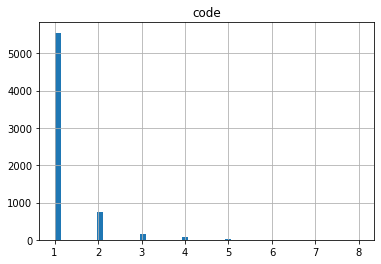

In [68]:
all_train[['term', 'code']].groupby('term').count().sort_values('code', ascending=False), \
all_train[['term', 'code']].groupby('term').count().sort_values('code', ascending=False).hist(bins=50)

In [70]:
all_train[all_train['term']=='sleep']

,term,sent,text,code,STR,SNMS
1574,sleep,NaN,"Sleep.<SENT>its all I want to do, however, una...",10020765.0,Hypersomnia,"['Hypersomnia', 'Hypersomnia, NOS', 'Hypersomn..."
33,sleep,NaN,Found out that it could be two months before I...,10040995.0,Sleep disturbance,"['Disturbance in sleep behavior', 'Disturbance..."
73,sleep,NaN,day 2 without nicotine: fuck sleep would be ni...,10022437.0,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
117,sleep,NaN,coming up this week: seroquel is notorious for...,10041349.0,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."
118,sleep,NaN,Thank god my steady stream of vyvanse is weari...,10011001.0,Corneal desquamation,[]
167,sleep,NaN,my sleep schedule is all fucked up and pristiq...,10004095.0,Barbiturate and similarly acting sedative or h...,[]
382,sleep,NaN,all i have done today is sleep. and i still ne...,10041014.0,Sleepiness,"['Drowsiness', 'Drowsiness', 'Sleepiness', 'Sl..."
55,sleep,NaN,NaN,10020765.0,Hypersomnia,"['Hypersomnia', 'Hypersomnia, NOS', 'Hypersomn..."


(            term
 code            
 10022437.0   416
 10033371.0   200
 10020765.0   156
 10047899.0   130
 10041349.0   118
 ...          ...
 10012359.0     1
 10036160.0     1
 10036208.0     1
 10036316.0     1
 10083286.0     1
 
 [1341 rows x 1 columns],
 array([[<AxesSubplot:title={'center':'term'}>]], dtype=object))

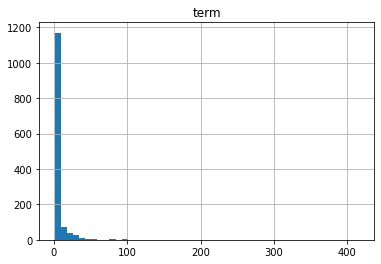

In [67]:
all_train[['term', 'code']].groupby('code').count().sort_values('term', ascending=False), \
all_train[['term', 'code']].groupby('code').count().sort_values('term', ascending=False).hist(bins=50)

# LLT\PT\HLT

In [128]:
hlt = pd.read_csv('../../data/external/meddra/hlt.asc', sep='$', header=None)[[0, 1]]
pt = pd.read_csv('../../data/external/meddra/pt.asc', sep='$', header=None)[[0, 1]]
llt = pd.read_csv('../../data/external/meddra/llt.asc', sep='$', header=None)[[0, 1]]
hlt_pt = pd.read_csv('../../data/external/meddra/hlt_pt.asc', sep='$', header=None)[[0, 1]]

In [159]:
code_sets = {
    'LLT': llt, 
    'PT ': pt,
    "HLT": hlt
}

for code_set_name, code_set in code_sets.items():
    
    for train_corp_name, train_corp in train_corpuces.items():
        check = train_corp['code'].apply(
            lambda code: 1 if int(code) in code_set[0].unique() else None
        ).dropna().shape[0]
        print("TRAIN", code_set_name, train_corp_name, '\t', check, '/', train_corp.shape[0])
        
    for test_corp_name, test_corp in test_corpuces.items():
        check = test_corp['code'].apply(
            lambda code: 1 if int(code) in code_set[0].unique() else None
        ).dropna().shape[0]
        print("TEST ", code_set_name, test_corp_name, '\t', check, '/', test_corp.shape[0])
    print()

TRAIN LLT cadec 	 1991 / 1991
TRAIN LLT psytar 	 2019 / 2029
TRAIN LLT smm4h21 	 1039 / 1039
TRAIN LLT smm4h17 	 2774 / 2774
TRAIN LLT concat 	 7823 / 7833
TEST  LLT cadec 	 881 / 881
TEST  LLT psytar 	 793 / 798
TEST  LLT smm4h21 	 287 / 287
TEST  LLT smm4h17 	 2496 / 2499

TRAIN PT  cadec 	 827 / 1991
TRAIN PT  psytar 	 1348 / 2029
TRAIN PT  smm4h21 	 345 / 1039
TRAIN PT  smm4h17 	 2766 / 2774
TRAIN PT  concat 	 5286 / 7833
TEST  PT  cadec 	 423 / 881
TEST  PT  psytar 	 575 / 798
TEST  PT  smm4h21 	 100 / 287
TEST  PT  smm4h17 	 2494 / 2499

TRAIN HLT cadec 	 0 / 1991
TRAIN HLT psytar 	 3 / 2029
TRAIN HLT smm4h21 	 0 / 1039
TRAIN HLT smm4h17 	 0 / 2774
TRAIN HLT concat 	 3 / 7833
TEST  HLT cadec 	 0 / 881
TEST  HLT psytar 	 1 / 798
TEST  HLT smm4h21 	 0 / 287
TEST  HLT smm4h17 	 1 / 2499

